In [5]:
# Install libraries
!pip install tensorflow scikit-learn pandas matplotlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [6]:
data = pd.read_csv('/content/flood.csv')

In [7]:
data.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,...,10,7,4,2,3,4,3,2,6,0.450
1,8,4,5,7,7,9,1,5,5,4,...,9,2,6,2,1,1,9,1,3,0.475
2,3,10,4,1,7,5,4,7,4,9,...,7,4,4,8,6,1,8,3,6,0.515
3,4,4,2,7,3,4,1,4,6,4,...,4,2,6,6,8,8,6,6,10,0.520
4,3,7,5,2,5,8,5,2,7,5,...,7,6,5,3,3,4,4,3,4,0.475


In [8]:
data.shape

(50000, 21)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   MonsoonIntensity                 50000 non-null  int64  
 1   TopographyDrainage               50000 non-null  int64  
 2   RiverManagement                  50000 non-null  int64  
 3   Deforestation                    50000 non-null  int64  
 4   Urbanization                     50000 non-null  int64  
 5   ClimateChange                    50000 non-null  int64  
 6   DamsQuality                      50000 non-null  int64  
 7   Siltation                        50000 non-null  int64  
 8   AgriculturalPractices            50000 non-null  int64  
 9   Encroachments                    50000 non-null  int64  
 10  IneffectiveDisasterPreparedness  50000 non-null  int64  
 11  DrainageSystems                  50000 non-null  int64  
 12  CoastalVulnerabili

Preprocessing Data

In [12]:
# Split into features and target
X = data.drop("FloodProbability", axis=1).values   # All columns except target
y = data["FloodProbability"].values                # Target column

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Build Feed Forward Neural Network

In [13]:
model = keras.Sequential([
    layers.Dense(32, input_dim=X_train.shape[1], activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Output: binary classification
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,217 (4.75 KB)

 Trainable params: 1,217 (4.75 KB)

 Non-trainable params: 0 (0.00 B)

Training The Model

In [15]:
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=16,
                    validation_data=(X_test, y_test),
                    verbose=1)


Epoch 1/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0000e+00 - loss: 0.6881 - val_accuracy: 0.0000e+00 - val_loss: 0.6881
Epoch 2/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0000e+00 - loss: 0.6881 - val_accuracy: 0.0000e+00 - val_loss: 0.6881
Epoch 3/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.0000e+00 - loss: 0.6881 - val_accuracy: 0.0000e+00 - val_loss: 0.6881
Epoch 4/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.0000e+00 - loss: 0.6881 - val_accuracy: 0.0000e+00 - val_loss: 0.6881
Epoch 5/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.0000e+00 - loss: 0.6881 - val_accuracy: 0.0000e+00 - val_loss: 0.6881


Evaluating The Model

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Accuracy: 0.9744

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98      5260
           1       0.95      1.00      0.97      4740

    accuracy                           0.97     10000
   macro avg       0.97      0.98      0.97     10000
weighted avg       0.98      0.97      0.97     10000



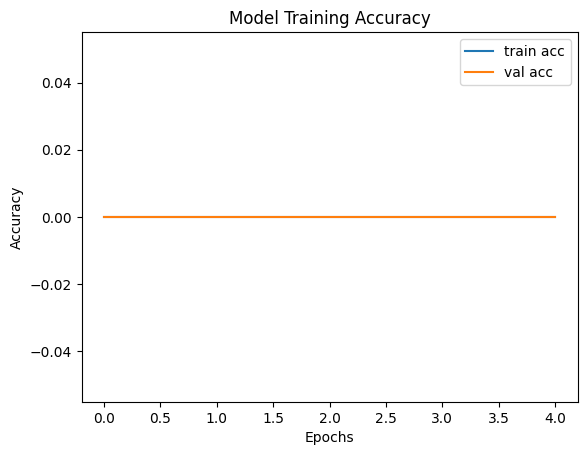

In [17]:
# Predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Convert y_test to binary for classification metrics
y_test_binary = (y_test > 0.5).astype("int32")

# Accuracy
print("Accuracy:", accuracy_score(y_test_binary, y_pred))
print("\nClassification Report:\n", classification_report(y_test_binary, y_pred))

# Plot training history
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Model Training Accuracy")
plt.show()

Making Predictions

In [19]:
# Example new input [MonsoonIntensity, TopographyDrainage, RiverManagement, Deforestation, Urbanization, ClimateChange, DamsQuality, Siltation, AgriculturalPractices, Encroachments, IneffectiveDisasterPreparedness, DrainageSystems, CoastalVulnerability, Landslides, Watersheds, DeterioratingInfrastructure, PopulationScore, WetlandLoss, InadequatePlanning, PoliticalFactors]
new_data = np.array([[
    250, 5.2, 70, 30,  # Placeholder values - Replace with actual data
    5, 6, 7, 8, 9, 10, # Placeholder values
    1, 2, 3, 4, 5, 6,  # Placeholder values
    7, 8, 9, 10       # Placeholder values
]])
new_data = scaler.transform(new_data)

prediction = model.predict(new_data)
print("Flood Risk:", "Yes" if prediction[0][0] > 0.5 else "No")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Flood Risk: Yes


A Feed Forward Neural Network (FFNN) can be effectively used to predict the likelihood of floods based on input features such as rainfall, river level, temperature, and soil moisture.

The model learns patterns and relationships between environmental factors and flood occurrence from historical data.

After training, the FFNN can predict future flood risks with good accuracy, helping in early warning systems and disaster management planning.

The evaluation (accuracy, classification report, loss/accuracy plots) shows how well the model performs.

The trained model can also be applied to real-time inputs (like today’s rainfall and river level) to forecast if there is a high flood risk.